In [10]:
import numpy as np

class ScratchSVMClassifier:
  """
  Scratch implementation of hard-margin linear SVM classifier
  """

  def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False,gamma=1.0, theta0=0.0, degree=2):
      self.iter = num_iter
      self.lr = lr
      self.kernel = kernel
      self.threshold = threshold
      self.verbose = verbose

      self.n_support_vectors = 0
      self.index_support_vectors = None
      self.X_sv = None
      self.lam_sv = None
      self.y_sv = None

      self.lam = None
      self.gamma = gamma
      self.theta0 = theta0
      self.degree = degree




  def _kernel_polynomial(self, x_i, x_j):
      return (self.gamma * np.dot(x_i, x_j) + self.theta0) ** self.degree

  def _kernel(self, x_i, x_j):
      if self.kernel == 'linear':
          return self._kernel_linear(x_i, x_j)
      elif self.kernel == 'polynomial' or self.kernel == 'polly':
          return self._kernel_polynomial(x_i, x_j)
      else:
          raise NotImplementedError("Unsupported kernel")
  def _kernel_linear(self, x_i, x_j):
      return np.dot(x_i, x_j)


#【problem 1】Lagrange’s steepest descent by the undetermined multiplier method
  def _update_lambda(self, i):
      n_samples = self.X.shape[0]
      summation = 0.0
      for j in range(n_samples):
          summation += self.lam[j] * self.y[j] * self.y[i] * self._kernel(self.X[i], self.X[j])

      new_lambda_i = self.lam[i] + self.lr * (1 - summation)

      if new_lambda_i < 0:
          new_lambda_i = 0

      return new_lambda_i

#【problem 2】Support vector determination
  def _select_support_vectors(self):
      sv_idx = np.where(self.lam > self.threshold)[0]
      self.index_support_vectors = sv_idx
      self.n_support_vectors = len(sv_idx)
      self.X_sv = self.X[sv_idx]
      self.lam_sv = self.lam[sv_idx].reshape(-1, 1)
      self.y_sv = self.y[sv_idx].reshape(-1, 1)
      if self.verbose:
          print(f"Number of support vectors: {self.n_support_vectors}")


#problem 3】Estimated
  def predict(self, X):
      """
      Predict labels for input X using support vectors:
      f(x) = sum_n lambda_n * y_sv_n * K(x, s_n)
      label = sign(f(x))
      """
      n_samples = X.shape[0]
      y_pred = np.zeros(n_samples)

      for i in range(n_samples):
          s = 0.0
          for n in range(self.n_support_vectors):
              s += (self.lam_sv[n] * self.y_sv[n] * self._kernel(X[i], self.X_sv[n]))
          y_pred[i] = s

      return np.sign(y_pred).astype(int)

#【problem 4】Learning and estimation
  def fit(self, X, y, X_val=None, y_val=None):
      """
      Train the SVM classifier.
      """
      self.X = X
      self.y = y
      n_samples, n_features = X.shape

      self.lam = np.zeros(n_samples)

      if self.verbose:
          print("Starting training...")

      for it in range(self.iter):
          for i in range(n_samples):
              self.lam[i] = self._update_lambda(i)
          self._select_support_vectors()
          if self.verbose and it % 100 == 0:
              print(f"Iteration {it}: updated lambdas")

      if self.verbose:
          print("Training completed.")

      return self



In [11]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)  # SVM expects labels -1 and 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm = ScratchSVMClassifier(num_iter=1000, lr=0.001, verbose=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Predictions:", y_pred)
print("True labels:", y_test)

Starting training...
Number of support vectors: 75
Iteration 0: updated lambdas
Number of support vectors: 68
Number of support vectors: 66
Number of support vectors: 63
Number of support vectors: 59
Number of support vectors: 54
Number of support vectors: 50
Number of support vectors: 48
Number of support vectors: 47
Number of support vectors: 46
Number of support vectors: 45
Number of support vectors: 43
Number of support vectors: 40
Number of support vectors: 37
Number of support vectors: 34
Number of support vectors: 32
Number of support vectors: 32
Number of support vectors: 32
Number of support vectors: 31
Number of support vectors: 31
Number of support vectors: 29
Number of support vectors: 28
Number of support vectors: 28
Number of support vectors: 28
Number of support vectors: 27
Number of support vectors: 26
Number of support vectors: 25
Number of support vectors: 25
Number of support vectors: 24
Number of support vectors: 24
Number of support vectors: 24
Number of support ve

/tmp/ipython-input-10-3889286352.py:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = s


/tmp/ipython-input-10-3889286352.py:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = s
/tmp/ipython-input-10-3889286352.py:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = s
/tmp/ipython-input-10-3889286352.py:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = s
/tmp/ipython-input-10-3889286352.py:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract 

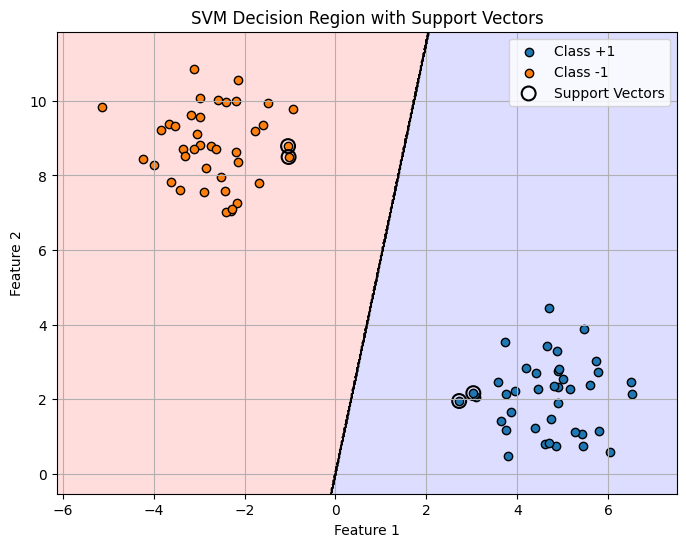

In [12]:
#【problem5】Visualization of decision area

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def decision_region(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.4)
    plt.contour(xx, yy, Z, colors='k', linewidths=1)

    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class +1", edgecolors='k')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], label="Class -1", edgecolors='k')

    if hasattr(model, 'X_sv'):
        plt.scatter(model.X_sv[:, 0], model.X_sv[:, 1], s=100, facecolors='none', edgecolors='black', linewidths=1.5, label='Support Vectors')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("SVM Decision Region with Support Vectors")
    plt.grid(True)
    plt.show()
decision_region(X_train, y_train, svm)

In [13]:
#【problem 6】(Advance task) Creation of polynomial kernel function
X, y = make_blobs(n_samples=100, centers=2, random_state=0)
y = np.where(y == 0, -1, 1)  # SVM expects -1 and 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm = ScratchSVMClassifier(num_iter=1000, lr=0.001, kernel='polynomial', gamma=1.0, theta0=1.0, degree=2, verbose=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

Starting training...
Number of support vectors: 63
Iteration 0: updated lambdas
Number of support vectors: 63
Number of support vectors: 60
Number of support vectors: 58
Number of support vectors: 55
Number of support vectors: 53
Number of support vectors: 51
Number of support vectors: 50
Number of support vectors: 50
Number of support vectors: 49
Number of support vectors: 50
Number of support vectors: 48
Number of support vectors: 48
Number of support vectors: 48
Number of support vectors: 48
Number of support vectors: 47
Number of support vectors: 45
Number of support vectors: 45
Number of support vectors: 45
Number of support vectors: 45
Number of support vectors: 46
Number of support vectors: 46
Number of support vectors: 45
Number of support vectors: 45
Number of support vectors: 45
Number of support vectors: 45
Number of support vectors: 45
Number of support vectors: 45
Number of support vectors: 44
Number of support vectors: 44
Number of support vectors: 44
Number of support ve

/tmp/ipython-input-10-3889286352.py:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = s
/tmp/ipython-input-10-3889286352.py:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = s
